## OpenSky flight trajectories

Flight path information for commercial flights is available for some regions of the USA and Europe from the crowd-sourced [OpenSky Network](https://opensky-network.org/).  OpenSky collects data from a large number of users monitoring public air-traffic control information.  Here we will use a subset of the data that was polled from their REST API at an interval of 1 minute over 4 days (September 5-13, 2016), using the collect_data.py and prepare_data.py.  In general the terms of use for OpenSky data do not allow redistribution, but we have obtained specific permission for distributing the subset of the data used in this project, which is a 200MB Parquet file (1.1GB as the original database). If you want more or different data, you can run the scripts yourself, or else you can contact OpenSky asking for a copy of the dataset.

**NOTE:**  This dataset is also explorable through the Datashader example dashboard. From inside the examples directory, run: `DS_DATASET=opensky panel serve --show dashboard.ipynb`

We'll only use some of the fields provided by OpenSky, out of: *icao24, callsign, origin, time_position, time_velocity, longitude, latitude, altitude, on_ground, velocity, heading, vertical_rate, sensors, timestamp*

Here, we'll load the data and declare that some fields are categorical (which isn't information fully expressed in the Parquet file):

In [1]:
%%time
import pandas as pd

flightpaths = pd.read_parquet('./data/opensky.parq')
flightpaths['origin']    = flightpaths.origin.astype('category')
flightpaths['ascending'] = flightpaths.ascending.astype('category')
flightpaths.tail()

CPU times: user 1.29 s, sys: 544 ms, total: 1.83 s
Wall time: 1.83 s


longitude      latitude origin ascending  velocity
10227905 -8.845280e+06  4.553381e+06             True    262.14
10227906 -8.862735e+06  4.540946e+06            False    183.28
10227907 -8.876594e+06  4.530873e+06            False    258.15
10227908 -8.894316e+06  4.521176e+06             True    234.24
10227909           NaN           NaN            False      0.00

The default database has about 10 million points, with some metadata for each.  

Now let's define a datashader-based processing pipeline to render images:

In [2]:
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire

import numpy as np

plot_width  = 850
plot_height = 600
x_range = (-2.0e6, 2.5e6)
y_range = (4.1e6, 7.8e6)

We can use this function to get a dump of all of the trajectory information:

CPU times: user 2.2 s, sys: 66.9 ms, total: 2.27 s
Wall time: 2.27 s


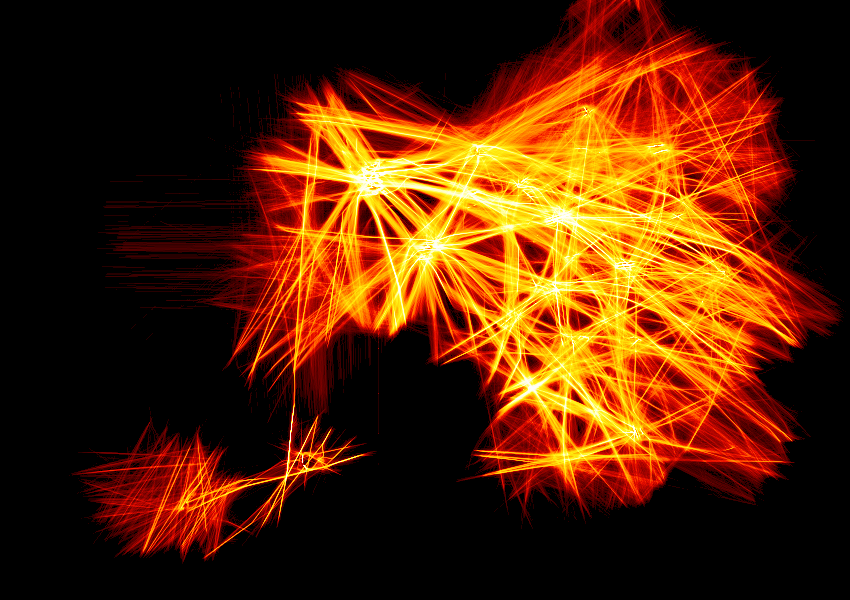

In [3]:
cvs = ds.Canvas(plot_width, plot_height, x_range, y_range)
%time agg = cvs.line(flightpaths, 'longitude', 'latitude',  ds.count())
tf.set_background(tf.shade(agg, cmap=fire), 'black')

This plot shows all of the trajectories in this database, overlaid in a way that avoids [overplotting](https://anaconda.org/jbednar/plotting_pitfalls/notebook).  With this "fire" color map, a single trajectory shows up as black, while increasing levels of overlap show up as brighter colors.  

A static image on its own like this is difficult to interpret, but if we overlay it on a map we can see where these flights originate, and can zoom in to see detail in specific regions:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
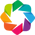

In [4]:
import holoviews as hv
from holoviews import opts
from holoviews.operation import datashader as hd
from holoviews.element.tiles import StamenTerrain
hv.extension('bokeh', 'matplotlib')

In [5]:
opts.defaults(
    opts.RGB(width=850, height=600, xaxis=None, yaxis=None))

In [6]:
tile_url ='http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{Z}/{Y}/{X}.png'
datashaded = hd.datashade(hv.Path(flightpaths, ['longitude', 'latitude']), 
                          x_range=x_range, y_range=y_range, aggregator=ds.count())
hv.Tiles(tile_url) * datashaded

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [longitude,latitude]   (R,G,B,A)

E.g. try zooming in on London in the above figure, which has a lot of structure not visible in the initial rendering but visible on a zoom. Note that zooming in will only reveal more detail in the datashader plot if you are working with a live server; a static HTML view (e.g. on Anaconda Cloud) will dynamically update the underlying map plot, but not the data.  

We can use the metadata associated with each trajectory to show additional information.  For instance, we can color each flight by its country of origin, using the key:

* **UK** - Orange
* **Germany** - Blue
* **Netherland** - Teal
* **Switzerland** - Yellow
* **France** - Purple
* **Norway** - Green
* **USA** - Red

(There are actually more than a hundred different origins, so this key is only approximate.)

In [7]:
def categorical_color_key(aggregator, cmap):
    """Generate a color key from the given colormap with the appropriate number of colors for flightpaths"""
    from matplotlib.colors import rgb2hex
    from matplotlib.cm import get_cmap
    ncats = len(flightpaths[aggregator.column].unique())
    return [str(rgb2hex(get_cmap(cmap)(i))) for i in np.linspace(0, 1, ncats)]

In [8]:
aggregator = ds.count_cat('origin')
datashaded = hd.datashade(hv.Path(flightpaths, ['longitude', 'latitude']), 
                          x_range=x_range, y_range=y_range, aggregator=aggregator, 
                          color_key=categorical_color_key(aggregator, 'hsv_r'))
hv.Tiles(tile_url) * datashaded

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [longitude,latitude]   (R,G,B,A)

Or we can label ascending (Blue) vs. descending flights (Red), which is particularly informative when zooming in on specific airports:

In [9]:
datashaded = hd.datashade(hv.Path(flightpaths, ['longitude', 'latitude']), 
                          x_range=x_range, y_range=y_range, aggregator=ds.count_cat('ascending'))
hv.Tiles(tile_url) * datashaded

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [longitude,latitude]   (R,G,B,A)

Or we can show velocity, which of course decreases (dark colors) when approaching or leaving airports:

In [10]:
datashaded = hd.datashade(hv.Path(flightpaths, ['longitude', 'latitude']), 
                          x_range=x_range, y_range=y_range, aggregator=ds.mean('velocity'), cmap=fire[::-1])
hv.Tiles(tile_url) * datashaded

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [longitude,latitude]   (R,G,B,A)

The flight patterns associated with each airport are clearly visible in these close-ups of various cities, where the circular holding pattern for landings (red) is clearly visible for the various airports in London:

In [11]:
hv.output(backend='matplotlib')

In [12]:
opts.defaults(
    opts.RGB(xaxis=None, yaxis=None, bgcolor='black', axiswise=True),
    opts.Layout(hspace=0.1, vspace=0, sublabel_format=None, framewise=True))

In [13]:
from datashader.geo import lnglat_to_meters

cities = {'Frankfurt' : (8.6821, 50.1109),
          'London'    : (-0.1278, 51.5074), 
          'Paris'     : (2.3522, 48.8566),
          'Amsterdam' : (4.8952, 52.3702),
          'Zurich'    : (8.5417, 47.3769),
          'Munich'    : (11.5820, 48.1351)}

radius = 150000
mercator_cities = {city: lnglat_to_meters(lon, lat) for city, (lon, lat) in cities.items()}
city_ranges = {city: dict(x_range=(lon-radius, lon+radius), y_range=(lat-radius, lat+radius))
               for city, (lon, lat) in mercator_cities.items()}



:Layout
   .RGB.Amsterdam :RGB   [longitude,latitude]   (R,G,B,A)
   .RGB.Frankfurt :RGB   [longitude,latitude]   (R,G,B,A)
   .RGB.London    :RGB   [longitude,latitude]   (R,G,B,A)
   .RGB.Munich    :RGB   [longitude,latitude]   (R,G,B,A)
   .RGB.Paris     :RGB   [longitude,latitude]   (R,G,B,A)
   .RGB.Zurich    :RGB   [longitude,latitude]   (R,G,B,A)
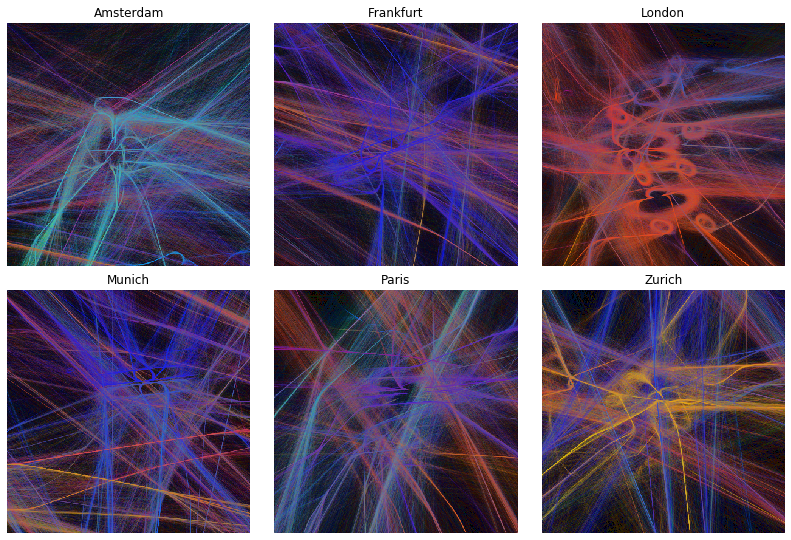

In [14]:
aggregator = ds.count_cat('origin')
hv.Layout([hd.datashade(hv.Path(flightpaths, ['longitude', 'latitude']), 
                        aggregator=aggregator, 
                        color_key=categorical_color_key(aggregator, 'hsv_r'),
                        dynamic=False, **ranges).relabel(city)
           for city, ranges in sorted(city_ranges.items())]).cols(3)

The patterns for a single city can make a nice wallpaper for your desktop if you wish:

:RGB   [longitude,latitude]   (R,G,B,A)
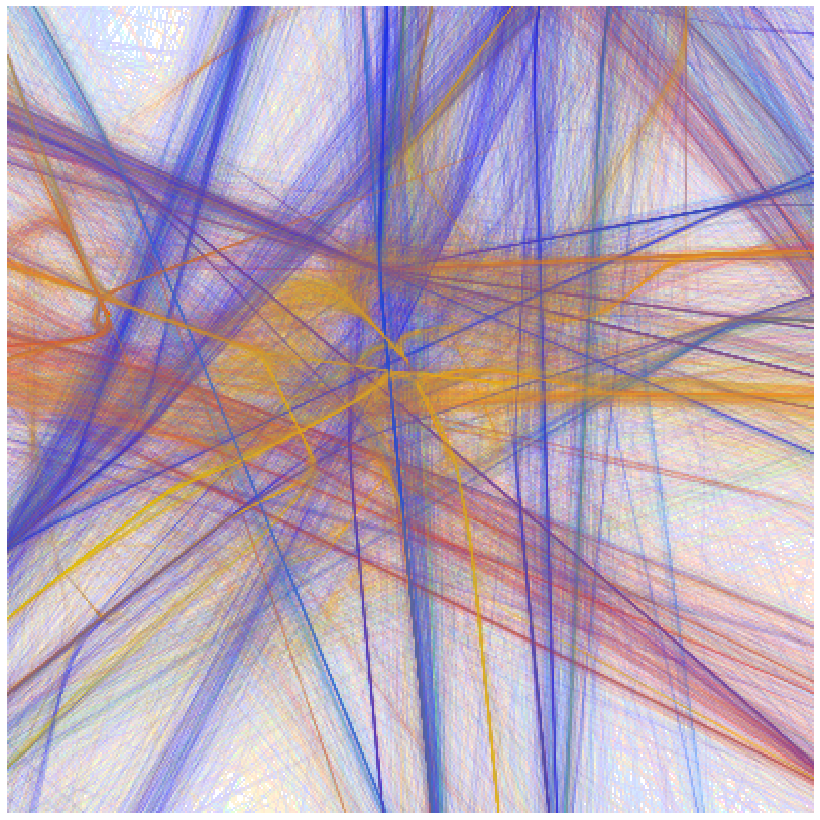

In [15]:
hd.datashade(hv.Path(flightpaths, ['longitude', 'latitude']), 
                        aggregator=aggregator, 
                        color_key=categorical_color_key(aggregator, 'hsv_r'),
                        dynamic=False, **city_ranges["Zurich"]).opts(fig_size=400, bgcolor=None)

As you can see, datashader makes it quite easy to explore even large databases of trajectory information, without trial and error parameter setting and experimentation.  These examples have millions of datapoints, but it could work with [billions](http://anaconda.org/jbednar/osm/notebook) just as easily, covering long time ranges or large geographic areas. Check out the other [datashader notebooks](http://anaconda.org/jbednar/notebooks) for other examples!

This data was obtained by running a cron job with the collect_data.py script running at one-minute intervals over a four-day period. Then the data was transformed into the Parquet format using the prepare_data.py script. 